In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statistics

sns.reset_defaults()
sns.set_context("talk")
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 18,
    "axes.titlesize": 18,
    "font.size": 18,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 12,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16
}

plt.rcParams.update(tex_fonts)

def read_interval(path):
    ints = {}
    with open(path) as fmq:
        for line in fmq:
            spl = line.strip().split('\t')
            chrom, start, end = spl
            if int(end)-int(start) == 1: continue
            ints[(chrom, int(start), int(end))] = []
    return ints
    

def read_overlap(int_path, ov_path):
    ints = read_interval(int_path)
    cov = []
    size_cov = []
    df = []
    c = 0
    with open(ov_path) as fov:
        for line in fov:
            spl = line.strip().split('\t')
            chrom_mq, start_mq, end_mq, chrom_mm, start_mm, end_mm, ov_len = spl
            if int(end_mq)-int(start_mq) == 1: continue
            ints[(chrom_mq, int(start_mq), int(end_mq))] += [(chrom_mm, start_mm, end_mm, int(ov_len))]
    for k_tup, vl in ints.items():
        chrom_mq, start_mq, end_mq = k_tup
        int_len = end_mq - start_mq
        tot_ov = sum([x[3] for x in vl])
        print("Interval length: ", int_len, "Total covered: ", float(tot_ov/int_len))
        cov += [float(tot_ov/int_len)* 100.0]
        size_cov += [(float(tot_ov/int_len)* 100.0, int_len)]
    return cov, size_cov

# load bed files
mq_path = '/home/baris/mapquik-chm13-complement.bed'
q60_path = '/home/baris/mapquik-minimap2-chm13-q60.overlaps'
q30_path = '/home/baris/mapquik-minimap2-chm13-q30.overlaps'
q20_path = '/home/baris/mapquik-minimap2-chm13-q20.overlaps'

q60_cov, q60_size_cov = read_overlap(mq_path, q60_path)
q30_cov, q30_size_cov = read_overlap(mq_path, q30_path)
q20_cov, q20_size_cov = read_overlap(mq_path, q20_path)
df = []
for i in range(len(q60_cov)):
    tup = (i, q60_size_cov[i][1], q60_size_cov[i][0], q30_size_cov[i][0], q20_size_cov[i][0])
    df += [tup]
    print(tup)
    


Interval length:  14524 Total covered:  1.0
Interval length:  48823 Total covered:  0.9711201687729144
Interval length:  6548 Total covered:  1.0
Interval length:  1255 Total covered:  1.0
Interval length:  56611 Total covered:  1.0
Interval length:  173324 Total covered:  1.0
Interval length:  1305 Total covered:  1.0
Interval length:  1986686 Total covered:  1.0
Interval length:  2405986 Total covered:  1.0
Interval length:  255358 Total covered:  1.0
Interval length:  24167 Total covered:  0.9664418421814871
Interval length:  161440 Total covered:  0.9631194251734391
Interval length:  19092 Total covered:  1.0
Interval length:  169526 Total covered:  1.0
Interval length:  3237 Total covered:  1.0
Interval length:  3450 Total covered:  1.0
Interval length:  10439 Total covered:  1.0
Interval length:  12188 Total covered:  1.0
Interval length:  19509 Total covered:  1.0
Interval length:  11440 Total covered:  0.023426573426573425
Interval length:  9827 Total covered:  1.0
Interval len

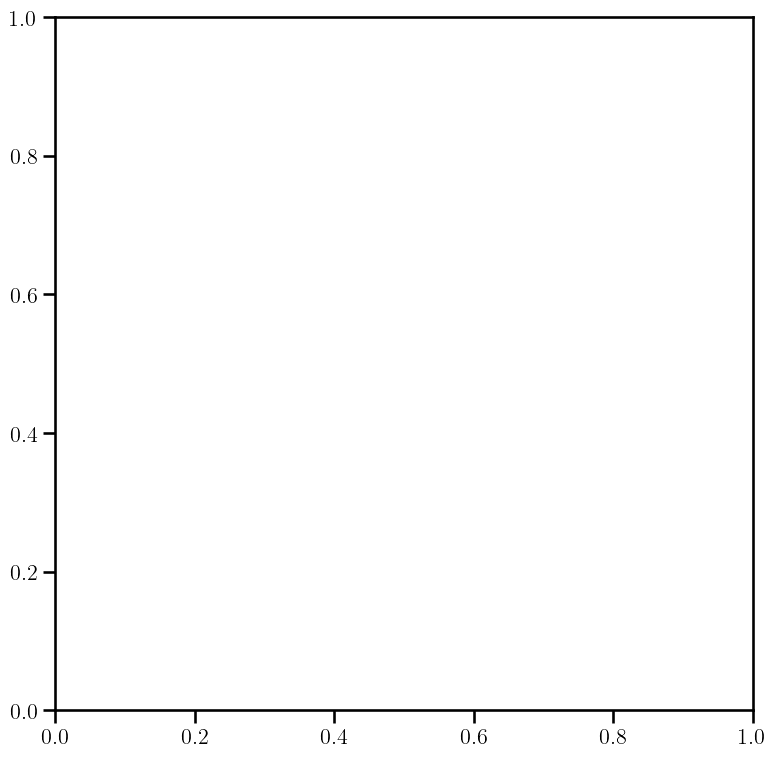

In [2]:
fig, a = plt.subplots(figsize=(9,9))

plt.show()

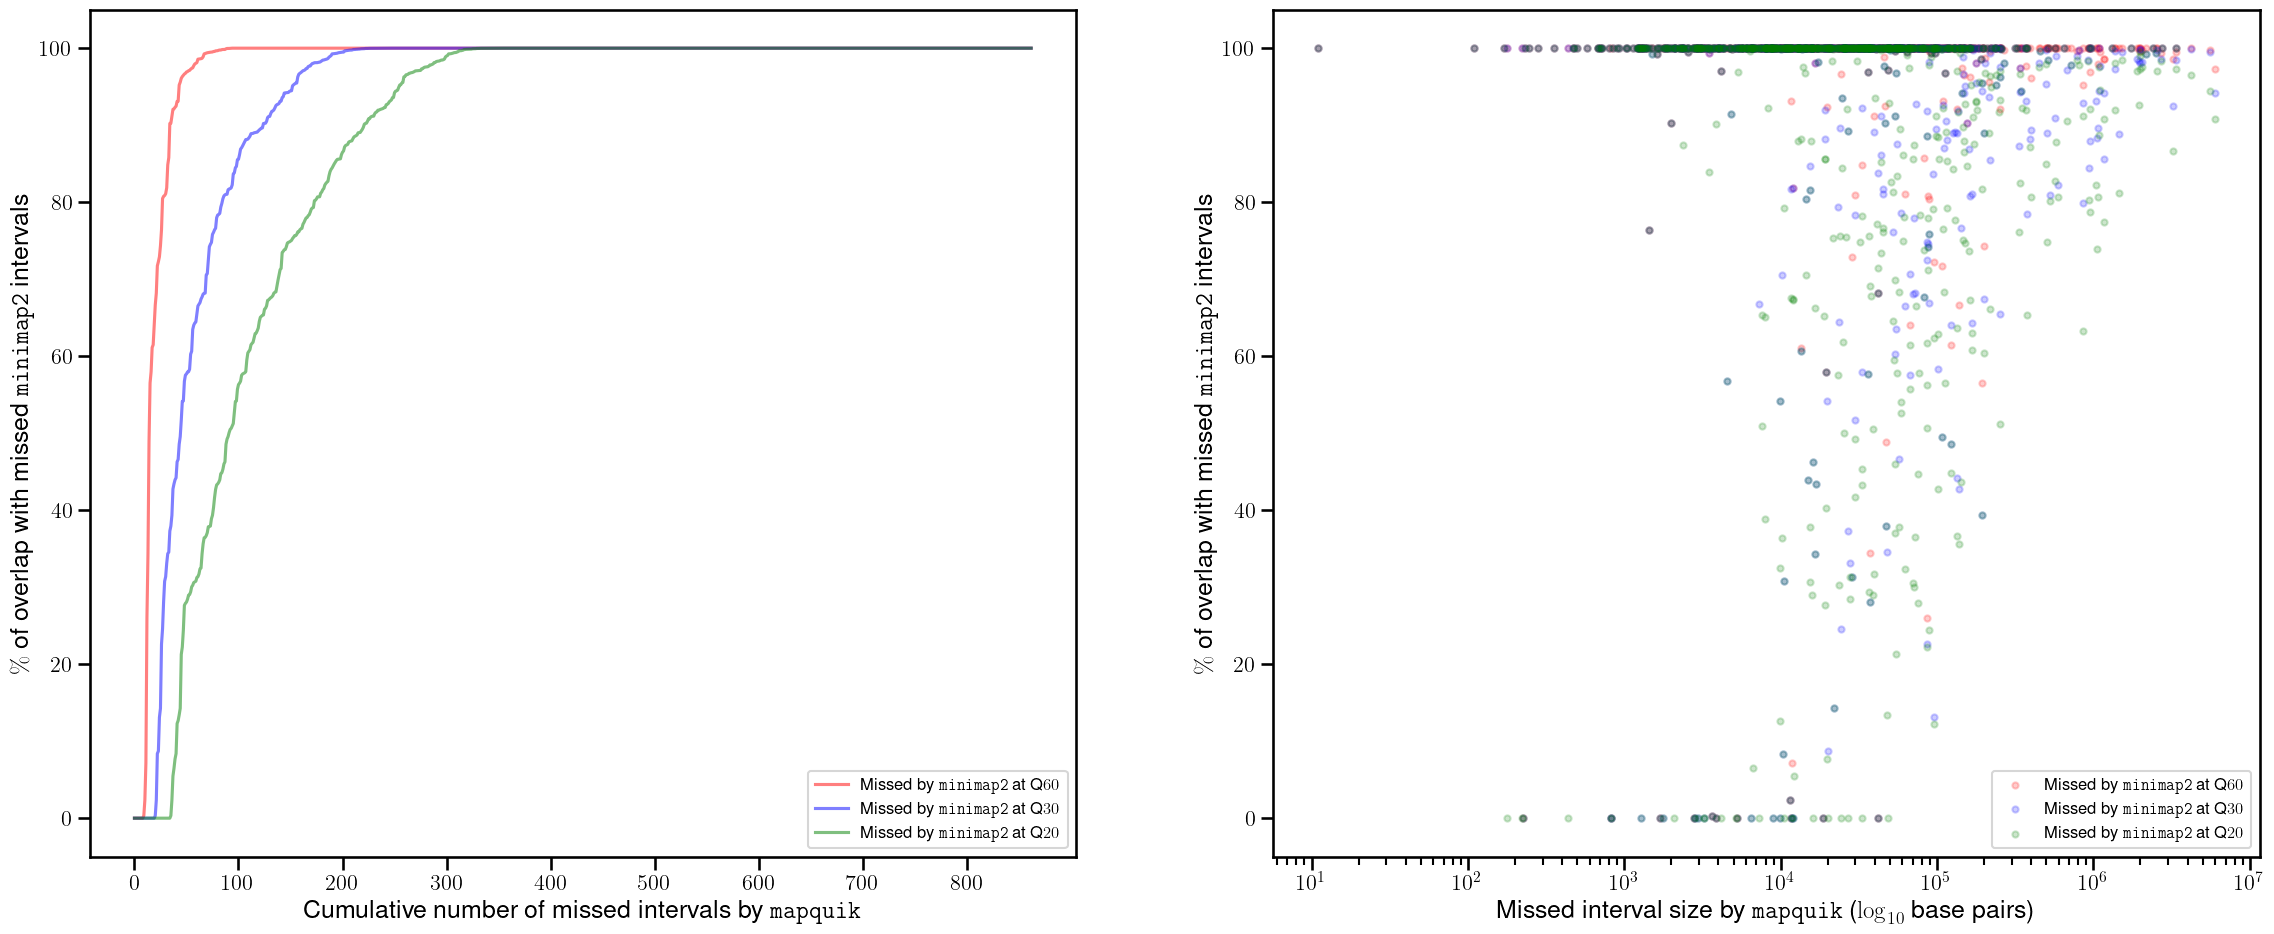

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(28,11))
i_df = pd.DataFrame([x for x in df],columns=('index','size','Q60', 'Q30', 'Q20'))
axes[0].plot(list(range(0, len(q60_cov))), sorted([float(x) for x in q60_cov]), label=r'Missed by $\texttt{minimap2}$ at Q$60$', c='r', alpha=0.5)
axes[0].plot(list(range(0, len(q30_cov))), sorted([float(x) for x in q30_cov]), label=r'Missed by $\texttt{minimap2}$ at Q$30$', c='b', alpha=0.5)
axes[0].plot(list(range(0, len(q20_cov))), sorted([float(x) for x in q20_cov]), label=r'Missed by $\texttt{minimap2}$ at Q$20$', c='g', alpha=0.5)
axes[0].legend()
axes[0].set_xticks(list(range(0, len(q60_cov), 100)))
axes[0].set_xlabel(r"Cumulative number of missed intervals by $\texttt{mapquik}$")
axes[0].set_ylabel(r"$\%$ of overlap with missed $\texttt{minimap2}$ intervals")
i_df.plot.scatter(ax=axes[1], x='size', y='Q60', alpha=0.2, c='red', label=r'Missed by $\texttt{minimap2}$ at Q$60$')
i_df.plot.scatter(ax=axes[1], x='size', y='Q30', alpha=0.2, c='blue', label=r'Missed by $\texttt{minimap2}$ at Q$30$')
i_df.plot.scatter(ax=axes[1], x='size', y='Q20', alpha=0.2, c='green', label=r'Missed by $\texttt{minimap2}$ at Q$20$')
axes[1].set_xscale("log")
axes[1].set_xlabel(r"Missed interval size by $\texttt{mapquik}$ ($\log_{10}$ base pairs)")
axes[1].set_ylabel(r"$\%$ of overlap with missed $\texttt{minimap2}$ intervals")
axes[1].legend(loc='lower right')
plt.show()
fig.savefig("interval_analysis.png", bbox_inches='tight', dpi =300)


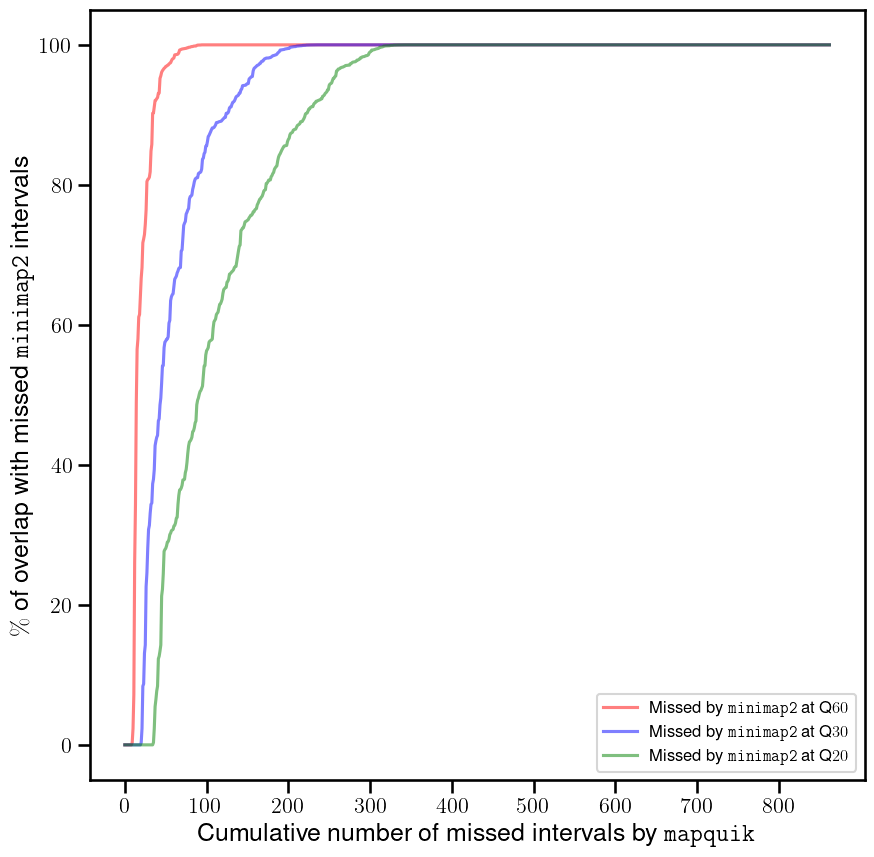

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
i_df = pd.DataFrame([x for x in df],columns=('index','size','Q60', 'Q30', 'Q20'))
ax.plot(list(range(0, len(q60_cov))), sorted([float(x) for x in q60_cov]), label=r'Missed by $\texttt{minimap2}$ at Q$60$', c='r', alpha=0.5)
ax.plot(list(range(0, len(q30_cov))), sorted([float(x) for x in q30_cov]), label=r'Missed by $\texttt{minimap2}$ at Q$30$', c='b', alpha=0.5)
ax.plot(list(range(0, len(q20_cov))), sorted([float(x) for x in q20_cov]), label=r'Missed by $\texttt{minimap2}$ at Q$20$', c='g', alpha=0.5)
ax.legend()
ax.set_xticks(list(range(0, len(q60_cov), 100)))
ax.set_xlabel(r"Cumulative number of missed intervals by $\texttt{mapquik}$")
ax.set_ylabel(r"$\%$ of overlap with missed $\texttt{minimap2}$ intervals")
plt.show()
fig.savefig("interval_analysis_1.png", bbox_inches='tight', dpi =300)


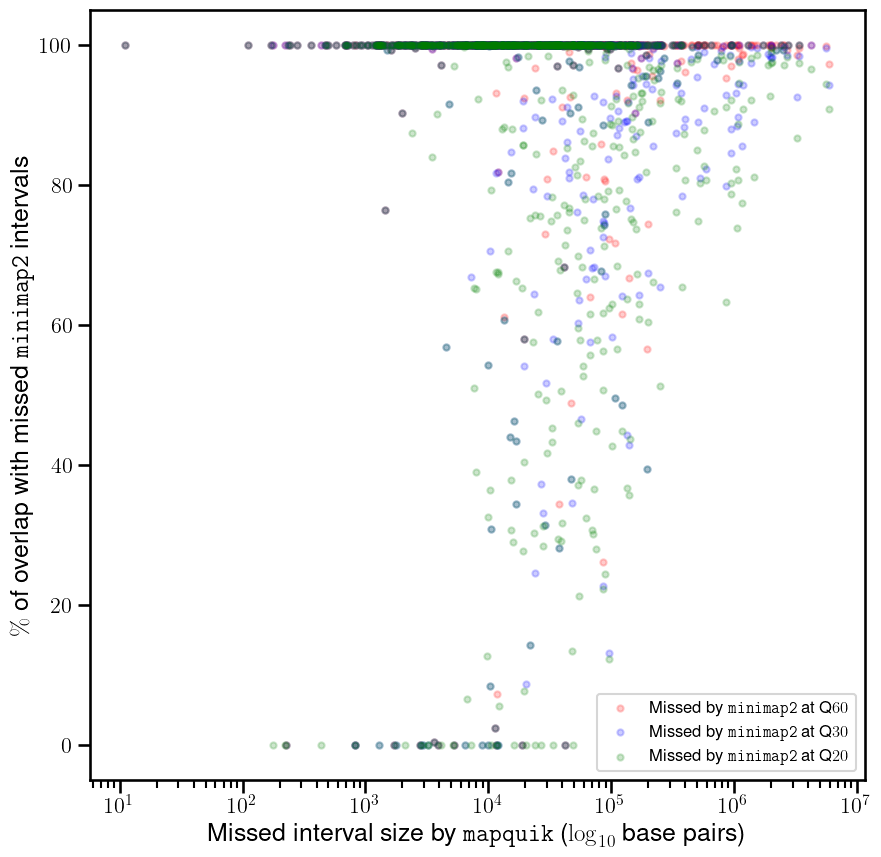

In [8]:
fig, a = plt.subplots(figsize=(10,10))
i_df.plot.scatter(ax=a, x='size', y='Q60', alpha=0.2, c='red', label=r'Missed by $\texttt{minimap2}$ at Q$60$')
i_df.plot.scatter(ax=a, x='size', y='Q30', alpha=0.2, c='blue', label=r'Missed by $\texttt{minimap2}$ at Q$30$')
i_df.plot.scatter(ax=a, x='size', y='Q20', alpha=0.2, c='green', label=r'Missed by $\texttt{minimap2}$ at Q$20$')
a.set_xscale("log")
a.set_xlabel(r"Missed interval size by $\texttt{mapquik}$ ($\log_{10}$ base pairs)")
a.set_ylabel(r"$\%$ of overlap with missed $\texttt{minimap2}$ intervals")
a.legend(loc='lower right')
plt.show()
fig.savefig("interval_analysis_2.png", bbox_inches='tight', dpi =300)